## Missing Values Imputation

#### Data Preprocessing and Feature Engineering
1) Detecting and Handling Outliers
2) Missing Values Imputation
3) Encoding Categorical Features
4) Feature Scaling
5) Extracting Information
6) Combining Information

- ***Missing Values***
- Missing values/data occure when no data value is stored for the variable in the observation
- If the missing values are not handled properly, you may end up building a biased machine learning model which will lead to incorrect result

#### Types of Missing Data
1) Missing Completely at Random (MCAR)
2) Missing at Random (MAR)
3) Missing not at Random (MNAR)

***1) Missing Completely at Random (MCAR)***
- Missing data is independent of observed and unobserved variables in the dataset (No Relationship)
- Data could be missing due to human error, some system or equipment failure, loss of sample, or some unsatisfactory techniques while recoding the values
- If data is MCAR, the statistical analysis remains unbaised

***2) Missing at Random (MAR)***
- Missing data is dependent on some observed variable in the dataset (Some Realtionship)
- For example, if you check the survey data, you may find that all the people have answered their ‘Gender’ but ‘Age’ values are mostly missing for people who have answered their ‘Gender’ as ‘female’
- If the data is MAR, the statistical analysis might result in bias. Getting an unbiased estimate of the parameters can be done only by modeling the missing data

***3) Missing Not at Random (MNAR)***
- Missing data is dependent on some oberserved as well as unobserved variables in the dataset
- For example, People having less income may refuse to share that information in a survey.
- If the data is MAR, the statistical analysis might result in bias. Getting an unbiased estimate of the parameters can be done only by modeling the missing data

#### Techniques of Handling Missing Values
- There are two primary ways of handling the missing values
1) Deleting the missing values (Drop rows having missing values or drop entire columns)
2) Imputing the Missing Values (Replacing missing values with another values)
- A)  Univariate Imputation (used when data is MCAR)
- B) Multivariate Imputation (used when data is MAR or NMAR) 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df = pd.read_csv('datasets/loan-eligibility.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
# To check non null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
# To check null values in each data
df.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
# To check total count of null values in each column
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
# To check percentage of null values in each column 
df.isna().mean()*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

#### Deleting the missing values
- Remove the rows that have missing values
- Use when missing values are Missing at Random (MAR) or Missing Completely at Random (MCAR)
- Missing data must not be more than 5-6% of the whole data 

#### Deleting the Entire Row
- df.dropna() method is used to drop rows or columns having NaN values
- ***df.dropna(axis, how, subset, inplace)***
- Where,
- axis=0 is used to drop the row with NaN values (default)
- axis=1 is used to drop the column with NaN values
- how='any' is used to drop the row/column, if any single value in it is NaN (default)
- how='all' is used to drop the row/column, if all values in it are NaN
- inplace=False will return the new dataframe (default)
- inplace=True will make change to original dataframe and returns None

In [26]:
# We can use the dropna() method to drop all the rows haaving NaN values
df1 = df.dropna(axis = 0, how = 'any', inplace = False)
# df1.isnull().sum()
print(df1.shape)
df1.isna().sum()

(480, 13)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
# We can use the dropna() method to drop all the columns having NaN values
df2 = df.dropna(axis = 1, how = 'any', inplace = False)
print(df2.shape)
df2.isna().sum()

(614, 6)


Loan_ID              0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
Property_Area        0
Loan_Status          0
dtype: int64

#### Imputing the Missing Values (Univariate)
- Imputation is a technique used for replacing the missing data with some substitute data to retain most of the information in the dataset
- ***Numerical Data***
1) Mean/Median Imputation
2) Arbitrary Value Imputaion
3) End of the tail Imputation
- ***Categorical Data***
1) Frequent Category Imputation
2) Adding "Missing" Category
- ***Date Time***
1) Use Forward Fill Technique
2) Use Backward Fill Technique

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('datasets/loan-eligibility.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Pandas fillna() method for Imputing the Missing Values
- ***df.fillna(value, method, inplace)***
- Where,
- value argument specifies the value to be imputed at the place of missing values (required)  method can be either
- ffill , which means moves forward and fill NaN with previous value
- bfill , which means moves backward and fill NaN with previous value
- inplace=False will return the new dataframe with missing values filled (default)
- inplace=True will make change to original dataframe with missing values filled and returns None

 #### 1) Replacing with Arbitrary Value

In [34]:
df1 = df.fillna(value = 'missing', inplace = False)
df1.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
# df2.columns
# df2
# df.shape


(614, 13)

In [44]:
df2 = df.copy()
df2['Dependents'] = df['Dependents'].fillna(value = 0, inplace = False)
df2.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### 2) Replacing with Mean

In [46]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
df['LoanAmount'] = df['LoanAmount'].fillna(value=df['LoanAmount'].mean(), inplace = False)
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### 3) Replacing with Mode

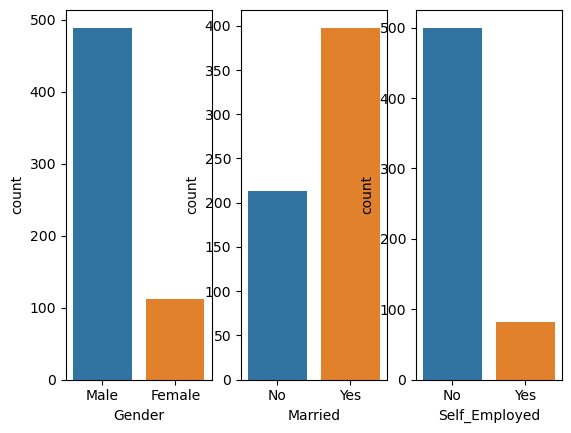

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
sns.countplot(x='Gender', data = df, ax=ax1)
sns.countplot(x='Married', data = df, ax=ax2)
sns.countplot(x='Self_Employed', data = df, ax=ax3)
plt.show();

In [53]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
df['Gender'] = df['Gender'].fillna(value=df['Gender'].mode()[0], inplace = False)
df['Married'] = df['Married'].fillna(value=df['Married'].mode()[0], inplace = False)
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### 4) Replacing with Median

In [54]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(value=df['Loan_Amount_Term'].median(), inplace = False)
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### 5) Backward Fardward fill and Backward Fill

In [58]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [70]:
df2 = df.copy()
df2.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [74]:
# df2['Self_Employed'] = df2['Self_Employed'].fillna(method = 'ffill', inplace = False)
df2['Self_Employed'] = df2['Self_Employed'].fillna(method = 'bfill', inplace = False)
df2.head(12)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


### Handling Missing Values using Scikit Learn Transformer
- Transformer are the python objects that transform a dataset in order to prepare it for predictive modeling
- SimpleImputer is used for univariate analysis
- IterativeImputer and KNNImputer are used for the multivariate analysis

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('datasets/loan-eligibility.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.isna().sum()
# If all the columns have the same data type then we can impute NaN value in one go

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
# Impute missing values under column 'Dependents' with value 0
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0)
imp.fit(df.iloc[:, 3:4])
df.iloc[:, 3:4] = imp.transform(df.iloc[:, 3:4])

In [13]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
# Impute most-frequent value for missing values under the column Gender, Married, Self-Employed
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df.iloc[:,[1,2,5]] = imp.fit_transform(df.iloc[:,[1,2,5]])

In [18]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
# Impute mean value for missing value under the column Loan_Amount_Term, LoanAmount, Credit_History
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df.iloc[:, 8:11] = imp.fit_transform(df.iloc[:, 8:11])

In [21]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

***Limitations of the SimpleImputer***
1) For each missing value type, we have to define a separate Imputer and fit transform one by one
- ***Solution:*** ColumnTransformer that allows transformation in different columns with different imputations and applies at the same time

### The Column Transformer Method of Sklearn 
- Allows tranformation in different columns with different imputations and applies at the same time

In [22]:
df = pd.read_csv('datasets/loan-eligibility.csv')
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Create the Tranformer
imp_const = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 0)
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp_mode = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

# Define Column Tranformer
column_trans = ColumnTransformer(
                              [
                                  ('imp_dependent', imp_const, [3]),
                                  ('impute_gend_marr_emp', imp_mean, [8,9,10]),
                                  ('impute_loan-amt-cr', imp_mode, [1,2,5])
                              ],
                            remainder = 'passthrough'
                            )
result_arr = column_trans.fit_transform(df)
print(result_arr)
print(result_arr.shape)

[['0' 146.41216216216216 360.0 ... 0.0 'Urban' 'Y']
 ['1' 128.0 360.0 ... 1508.0 'Rural' 'N']
 ['0' 66.0 360.0 ... 0.0 'Urban' 'Y']
 ...
 ['1' 253.0 360.0 ... 240.0 'Urban' 'Y']
 ['2' 187.0 360.0 ... 0.0 'Urban' 'Y']
 ['0' 133.0 360.0 ... 0.0 'Semiurban' 'N']]
(614, 13)


In [26]:
df_imputed = pd.DataFrame(data = result_arr, columns = df.columns)
df_imputed.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- ***Limitations of Column Tranformer***
1) We cannot apply multiple transform to a single column
- ***Solution***: Pipeline is a sequence of operations where output of one operation becomes input to its subsequent operation

### Multivariate Imputation
1) Iterative Imputor
2) KNN Imputer

#### 1) Iterative Imputer
- Multivariate imputer that estimates each feature from all the others
- IterativeImputer impute the missing values by modeling each feature having missing values as a function of other features in a round-robin fashion
- Best use of it is when missing values at missing at random (MAR)


#### Algorithm of the Iterative Imputer
- Step 1: A feature column having NaN is designated as output and the other feature columns are treated as inputs.
- Step 2: Regressor predicts missing output.
- Step 3: This is done for each feature in an iterative fashion, and then repeated for specified iterations.
- Step 4: Results from the final iteration are used for imputation


In [2]:
import pandas as pd
X = pd.DataFrame({
 'x1':[np.nan,2,3,4,5],
 'x2':[6,np.nan,8,9,10],
 'x3':[11,12,np.nan,14,15],
 'x4':[16,17,18,19,np.nan]
 })
X


,x1,x2,x3,x4
0,NaN,6.0,11.0,16.0
1,2.0,NaN,12.0,17.0
2,3.0,8.0,NaN,18.0
3,4.0,9.0,14.0,19.0
4,5.0,10.0,15.0,NaN


In [3]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
it_imp = IterativeImputer(estimator = lr, missing_values = np.nan, initial_strategy = 'mean', max_iter = 10)
it_imp.fit_transform(X)

array([[ 1.,  6., 11., 16.],
       [ 2.,  7., 12., 17.],
       [ 3.,  8., 13., 18.],
       [ 4.,  9., 14., 19.],
       [ 5., 10., 15., 20.]])

#### KNN Imputer
- Impute the missing values by using the mean value from K nearest neighbours found in the training set.
- 𝑛𝑎𝑛_𝑑𝑖𝑠𝑡𝑎𝑛𝑐𝑒 = sqrt (𝑤𝑒𝑖𝑔ℎ𝑡 ∗ (distance from present coordinates)**2)
- 𝑤𝑒𝑖𝑔ℎ𝑡 = (Total number of coordinates)/(number of present coordinates)

In [7]:
import pandas as pd
X = pd.DataFrame({
 'x1':[23,np.nan, 13, 30,25],
 'x2':[np.nan, 35,41,np.nan,50],
 'x3':[57,58,61,71,69],
 'x4':[11,2,8,np.nan, np.nan]
 })
X


,x1,x2,x3,x4
0,23.0,NaN,57,11.0
1,NaN,35.0,58,2.0
2,13.0,41.0,61,8.0
3,30.0,NaN,71,NaN
4,25.0,50.0,69,NaN


In [ ]:
from sklearn.impute import KKNImputer
knn_imp = KNNImputer(n_neighbors=2)
knn_imp.fit_transform(X)